# 목차
1. 데이터 불러오기
2. 데이터 탐색과정(Feature Engineering)
    * 결측치 여부 확인
    * 데이터 분포 확인
    * categorical feature 처리
    * numerical feature 처리
3. feature 선택
4. model 선택


## 1. 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 필요한 모듈 import
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# train, test 데이터 가져오기
# booking_status는 0, 1로 바꾸어 가져오기
train = pd.read_csv('./train.csv')
train["booking_status"] = train["booking_status"].replace({'Canceled':1, 'Not_Canceled':0})

test = pd.read_csv('./test.csv')
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,1
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,1
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,0
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,0
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,0


## 2. 데이터 탐색 과정(Feature Engineering)

In [4]:
# train data 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  object 
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

In [5]:
# 비어있는 값 확인 -> 없음, 그냥 진행해도 됨
train.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
# Booking_ID는 상관 없으니 삭제
train.drop(['Booking_ID'], axis=1, inplace=True)
test.drop(['Booking_ID'], axis=1, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          25392 non-null  int64  
 1   no_of_children                        25392 non-null  int64  
 2   no_of_weekend_nights                  25392 non-null  int64  
 3   no_of_week_nights                     25392 non-null  int64  
 4   type_of_meal_plan                     25392 non-null  object 
 5   required_car_parking_space            25392 non-null  int64  
 6   room_type_reserved                    25392 non-null  object 
 7   lead_time                             25392 non-null  int64  
 8   arrival_year                          25392 non-null  int64  
 9   arrival_month                         25392 non-null  int64  
 10  arrival_date                          25392 non-null  int64  
 11  market_segment_

### 전반적인 데이터 확인

### feature 처리 - categorical

In [8]:
cat_cols = [col for col in train.columns if train[col].dtype == object]
cat_cols

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [9]:
# for data in [train, test]:

#### 1. type_of_meal_plan

In [10]:
train['type_of_meal_plan'].value_counts()

Meal Plan 1     19492
Not Selected     3560
Meal Plan 2      2338
Meal Plan 3         2
Name: type_of_meal_plan, dtype: int64

In [11]:
meal_mapping = {
    'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Not Selected': 2, 'Meal Plan 3': 0
}

for data in [train, test]:
    data['type_of_meal_plan'] = data['type_of_meal_plan'].map(meal_mapping)

#### 2. room_type_reserved

In [12]:
train['room_type_reserved'].value_counts()

Room_Type 1    19684
Room_Type 4     4242
Room_Type 6      667
Room_Type 2      498
Room_Type 5      186
Room_Type 7      111
Room_Type 3        4
Name: room_type_reserved, dtype: int64

In [13]:
roomType_mapping = {
    'Room_Type 1': 0, 'Room_Type 4': 1, 'Room_Type 6': 2, 'Room_Type 2': 3, 'Room_Type 5': 4, 'Room_Type 7': 5, 'Room_Type 3': 6
}

for data in [train, test]:
    data['room_type_reserved'] = data['room_type_reserved'].map(roomType_mapping)

#### 3. market_segment_type

In [14]:
train['market_segment_type'].value_counts()

Online           16210
Offline           7398
Corporate         1427
Complementary      272
Aviation            85
Name: market_segment_type, dtype: int64

In [15]:
marketType_mapping = {
    'Online': 0, 'Offline': 1, 'Corporate': 2, 'Complementary': 3, 'Aviation': 4
}

for data in [train, test]:
    data['market_segment_type'] = data['market_segment_type'].map(marketType_mapping)

In [16]:
# 변경사항 확인
train[cat_cols].head()

,type_of_meal_plan,room_type_reserved,market_segment_type
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,1
4,0,0,0


In [17]:
test[cat_cols].head()

,type_of_meal_plan,room_type_reserved,market_segment_type
0,0,0,0
1,0,1,1
2,0,0,0
3,0,0,0
4,0,1,0


### feature 처리 - numerical

In [18]:
# train data 중 cat_cols에 들어가 있지 않은 column: numerical
num_cols = [col for col in train.columns if col not in cat_cols]

# booking_status는 target이므로 제외
num_cols.remove('booking_status')

num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [19]:
# date와 관련된 column은 따로 빼둠
date = [
    'arrival_year', 'arrival_month', 'arrival_date'
]

for col in date:
    num_cols.remove(col)

In [20]:
# numerical 데이터 확인
train[num_cols].describe().T.style

,count,mean,std,min,25%,50%,75%,max
no_of_adults,25392.000000,1.845069,0.519044,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,25392.000000,0.105151,0.401900,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,25392.000000,0.810137,0.867761,0.000000,0.000000,1.000000,2.000000,6.000000
no_of_week_nights,25392.000000,2.201323,1.396599,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,25392.000000,0.031348,0.174261,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,25392.000000,85.411508,85.745937,0.000000,17.000000,58.000000,127.000000,443.000000
repeated_guest,25392.000000,0.025165,0.156630,0.000000,0.000000,0.000000,0.000000,1.000000
no_of_previous_cancellations,25392.000000,0.023905,0.378652,0.000000,0.000000,0.000000,0.000000,13.000000
no_of_previous_bookings_not_canceled,25392.000000,0.156191,1.818933,0.000000,0.000000,0.000000,0.000000,58.000000
avg_price_per_room,25392.000000,103.485770,35.067053,0.000000,80.750000,99.865000,120.150000,375.500000


lead_time, avg_price_per_room에서 이상치가 감지됨

#### 이상치 제거

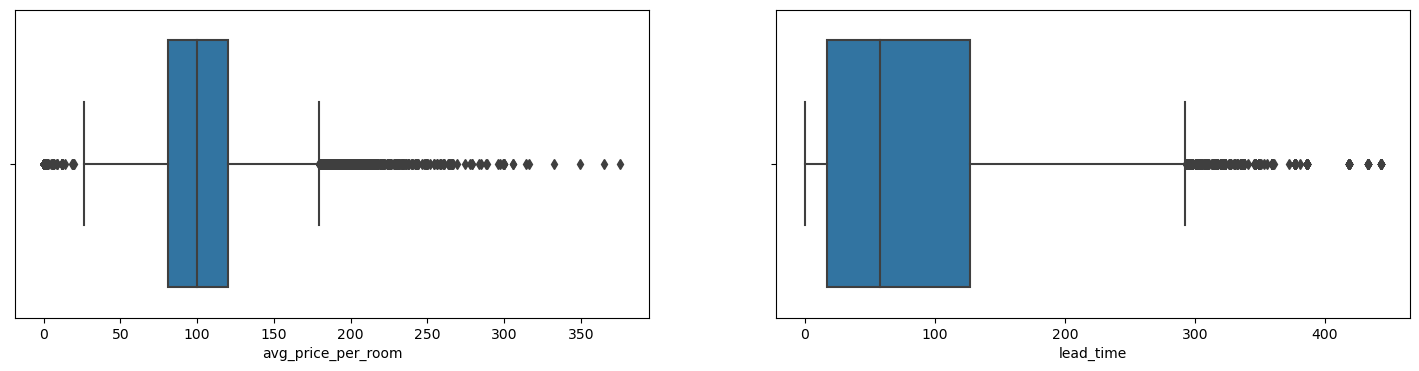

In [21]:
outliers_col = ['avg_price_per_room', 'lead_time']

fig, axis = plt.subplots(1, 2, figsize=(18,4))
ax = axis.flatten()

for i, fea in enumerate(outliers_col): 
    sns.boxplot(data=train, x=train[fea], ax=axis[i])


* avg_price_per_room: 340부터 outlier로 판정
* lead_time: 400부터 outlier로 판정

In [22]:
# outlier로 판정된 데이터는 train data set에서 삭제
train = train[train['avg_price_per_room'] < 340]
train = train[train['lead_time'] < 400]

#### feature 생성

In [23]:
# no_of_total_nights = no_of_weekend_nights + no_of_week_nights
for data in [train, test]:
    data['no_of_total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
    data['no_of_total_guests'] = data['no_of_adults'] + data['no_of_children']

feature를 합치는게 booking_status과의 연관성이 좋을지 아닐지 판단하기 위해서 이전 column은 삭제하지 않음. 상관계수 판단 후 선택적으로 삭제할 에정

In [24]:
# train 데이터 확인
train[num_cols].describe().T.style

,count,mean,std,min,25%,50%,75%,max
no_of_adults,25321.000000,1.844714,0.519578,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,25321.000000,0.105328,0.402210,0.000000,0.000000,0.000000,0.000000,10.000000
no_of_weekend_nights,25321.000000,0.810868,0.868467,0.000000,0.000000,1.000000,2.000000,6.000000
no_of_week_nights,25321.000000,2.201927,1.398071,0.000000,1.000000,2.000000,3.000000,17.000000
required_car_parking_space,25321.000000,0.031436,0.174497,0.000000,0.000000,0.000000,0.000000,1.000000
lead_time,25321.000000,84.495004,84.011842,0.000000,17.000000,57.000000,126.000000,386.000000
repeated_guest,25321.000000,0.025236,0.156844,0.000000,0.000000,0.000000,0.000000,1.000000
no_of_previous_cancellations,25321.000000,0.023972,0.379180,0.000000,0.000000,0.000000,0.000000,13.000000
no_of_previous_bookings_not_canceled,25321.000000,0.156629,1.821462,0.000000,0.000000,0.000000,0.000000,58.000000
avg_price_per_room,25321.000000,103.511454,34.972409,0.000000,80.750000,99.900000,120.500000,332.570000


In [25]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_total_nights,no_of_total_guests
0,2,0,1,3,0,0,0,200,2018,8,29,0,0,0,0,90.95,0,1,4,2
1,2,0,1,3,0,0,0,79,2018,3,24,0,0,0,0,90.95,1,1,4,2
2,2,0,1,4,0,0,1,78,2018,4,6,0,0,0,0,99.45,1,0,5,2
3,2,0,2,0,0,0,0,61,2017,10,4,1,0,0,0,91.00,0,0,2,2
4,2,1,0,4,0,0,0,201,2018,11,1,0,0,0,0,82.28,3,0,4,3


#### 정규화하기

In [26]:
train.var()

no_of_adults                               0.269961
no_of_children                             0.161773
no_of_weekend_nights                       0.754236
no_of_week_nights                          1.954603
type_of_meal_plan                          0.514953
required_car_parking_space                 0.030449
room_type_reserved                         0.572749
lead_time                               7057.989558
arrival_year                               0.148268
arrival_month                              9.373235
arrival_date                              76.106050
market_segment_type                        0.464808
repeated_guest                             0.024600
no_of_previous_cancellations               0.143778
no_of_previous_bookings_not_canceled       3.317726
avg_price_per_room                      1223.069367
no_of_special_requests                     0.619347
booking_status                             0.219102
no_of_total_nights                         3.104497
no_of_total_

분산이 상대적으로 큰 lead_time, arrival_month, arrival_date, avg_price_per_room에 대해서 정규화

In [27]:
columns = ['lead_time', 'avg_price_per_room']

for data in [test, train]:
    data[columns[0]] = np.log(data[columns[0]] + 1)
    data[columns[1]] = np.log(data[columns[1]] + 1)

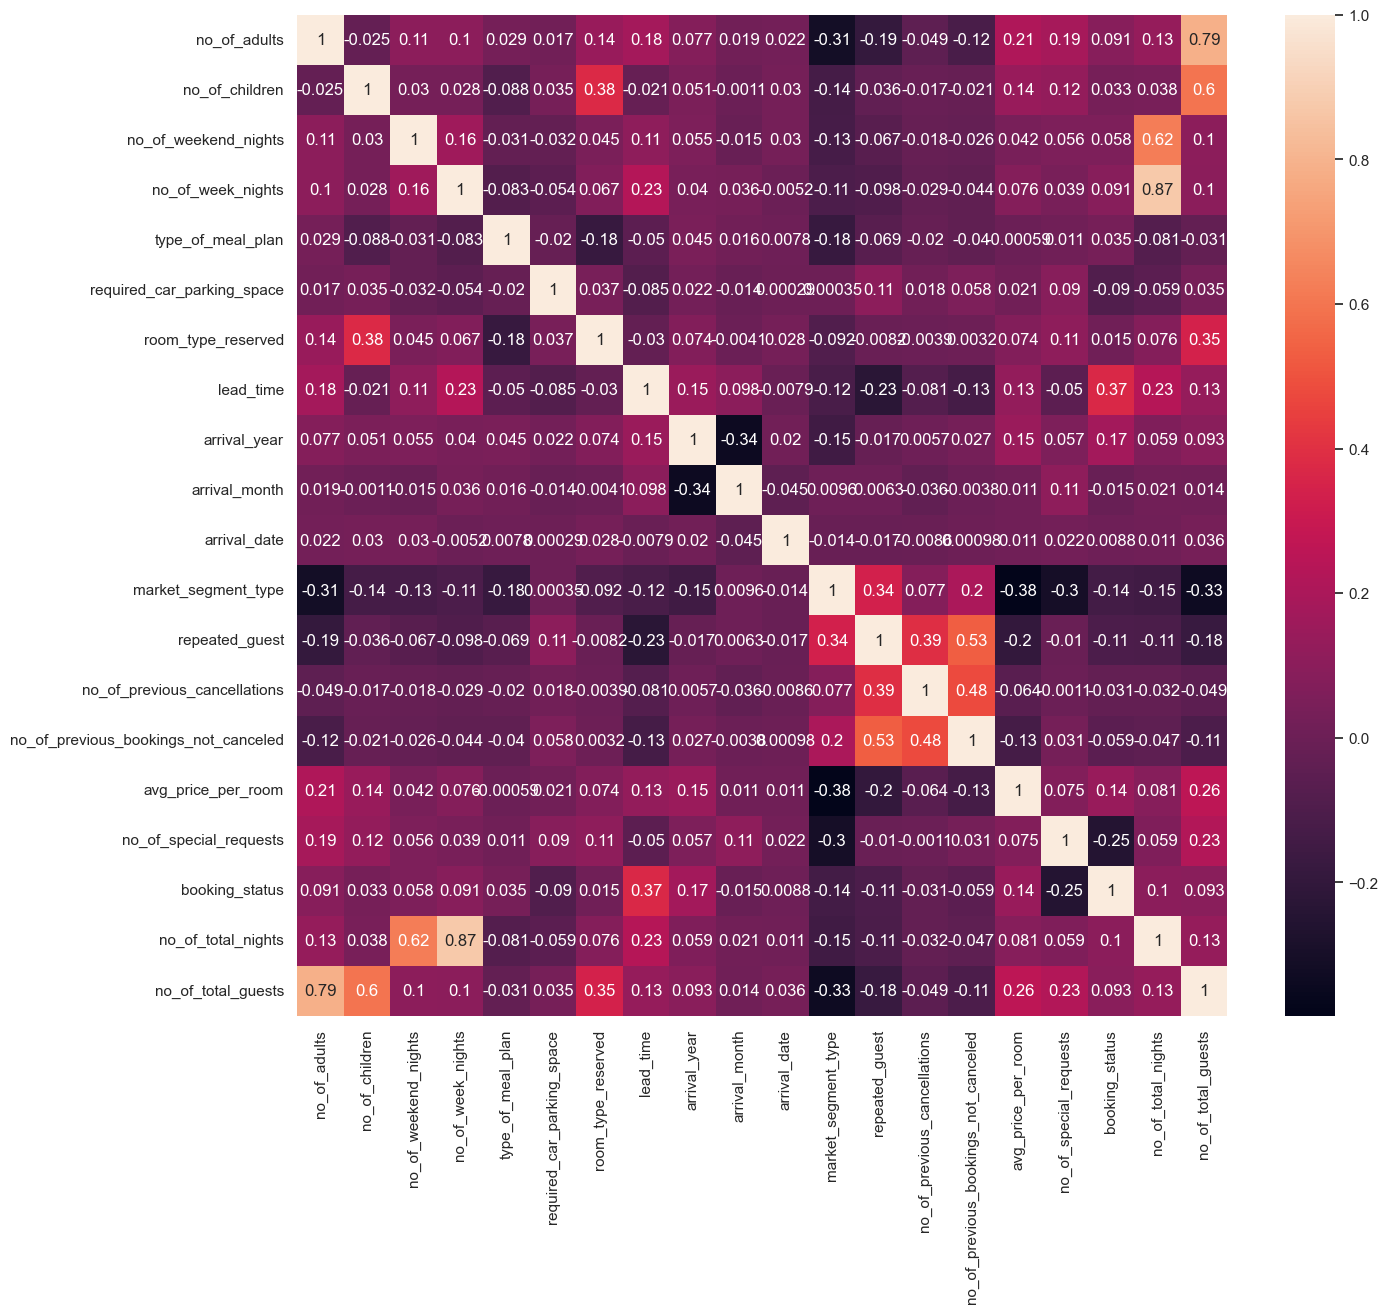

In [28]:
sns.set(rc={'figure.figsize':(15, 13)}) 
correlation_matrix = train.corr()
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

In [29]:
correlation = train.corr()['booking_status'].abs().sort_values(ascending = False)
correlation

booking_status                          1.000000
lead_time                               0.372242
no_of_special_requests                  0.252834
arrival_year                            0.174230
avg_price_per_room                      0.141345
market_segment_type                     0.139632
repeated_guest                          0.106602
no_of_total_nights                      0.101183
no_of_total_guests                      0.093087
no_of_week_nights                       0.091273
no_of_adults                            0.090897
required_car_parking_space              0.089966
no_of_previous_bookings_not_canceled    0.058541
no_of_weekend_nights                    0.058349
type_of_meal_plan                       0.034941
no_of_children                          0.032802
no_of_previous_cancellations            0.030660
room_type_reserved                      0.015161
arrival_month                           0.014705
arrival_date                            0.008772
Name: booking_status

In [30]:
# 필요없는 feature drop
feature_drop = [
    'arrival_date',
    'arrival_month',
    # 'room_type_reserved',
    'no_of_previous_cancellations',
    'no_of_children',
    'type_of_meal_plan',
    'no_of_weekend_nights',
    # 'no_of_previous_bookings_not_canceled',
]

train.drop(feature_drop, axis=1, inplace=True)
test.drop(feature_drop, axis=1, inplace=True)

* no_of_adults 한번 써먹었기 때문에 삭제할것
* no_of_week_night도 한번 써먹었기 때문에 삭제할 것

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25321 entries, 0 to 25391
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          25321 non-null  int64  
 1   no_of_week_nights                     25321 non-null  int64  
 2   required_car_parking_space            25321 non-null  int64  
 3   room_type_reserved                    25321 non-null  int64  
 4   lead_time                             25321 non-null  float64
 5   arrival_year                          25321 non-null  int64  
 6   market_segment_type                   25321 non-null  int64  
 7   repeated_guest                        25321 non-null  int64  
 8   no_of_previous_bookings_not_canceled  25321 non-null  int64  
 9   avg_price_per_room                    25321 non-null  float64
 10  no_of_special_requests                25321 non-null  int64  
 11  booking_status 

In [32]:
train.head()

,no_of_adults,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_total_nights,no_of_total_guests
0,2,3,0,0,5.303305,2018,0,0,0,4.521245,0,1,4,2
1,2,3,0,0,4.382027,2018,0,0,0,4.521245,1,1,4,2
2,2,4,0,1,4.369448,2018,0,0,0,4.609660,1,0,5,2
3,2,0,0,0,4.127134,2017,1,0,0,4.521789,0,0,2,2
4,2,4,0,0,5.308268,2018,0,0,0,4.422208,3,0,4,3


## 5. model prediction

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25321 entries, 0 to 25391
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          25321 non-null  int64  
 1   no_of_week_nights                     25321 non-null  int64  
 2   required_car_parking_space            25321 non-null  int64  
 3   room_type_reserved                    25321 non-null  int64  
 4   lead_time                             25321 non-null  float64
 5   arrival_year                          25321 non-null  int64  
 6   market_segment_type                   25321 non-null  int64  
 7   repeated_guest                        25321 non-null  int64  
 8   no_of_previous_bookings_not_canceled  25321 non-null  int64  
 9   avg_price_per_room                    25321 non-null  float64
 10  no_of_special_requests                25321 non-null  int64  
 11  no_of_total_nig

In [57]:
# X_train = train.drop(['booking_status'], axis=1, inplace=True)
target = train['booking_status']
train.drop(['booking_status'], axis=1, inplace=True)

KeyError: 'booking_status'

In [58]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int64

In [68]:
clf_tree = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=4,
    # random_state=1
)
scoring = 'accuracy'
score = cross_val_score(clf_tree, train, target, cv=k_fold, n_jobs=2, scoring=scoring)
print(score)

[0.85471773 0.86255924 0.84597156 0.86611374 0.85663507 0.86097946
 0.85308057 0.85308057 0.85663507 0.85860979]


In [69]:
# Decision Tree score
round(np.mean(score) * 100, 2)

85.68

In [67]:
knn = KNeighborsClassifier(
    n_neighbors=33,
    weights='distance',
    metric=''
)
scoring = 'accuracy'
# knn.fit(new_train, target)
score = cross_val_score(knn, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._chec

In [64]:
# kNN score
round(np.mean(score) * 100, 2)

86.75

In [42]:
# GaussianNB
nb_model = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(nb_model, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.45834978 0.42180095 0.48420221 0.47709321 0.44312796 0.45537125
 0.44905213 0.47274882 0.47314376 0.44984202]


In [43]:
# GaussianNB score
round(np.mean(score) * 100, 2)

45.85

In [58]:
# LogisticRegression
lr_model = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(lr_model, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[0.78484011 0.79146919 0.78278041 0.80015798 0.78672986 0.80015798
 0.78515008 0.78988942 0.80489731 0.79383886]


/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [59]:
# multi-layer perceptron
mlp_model = MLPClassifier()
scoring = 'accuracy'
score = cross_val_score(mlp_model, train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.69443348 0.75434439 0.68404423 0.74921011 0.77725118 0.76224329
 0.70300158 0.72906793 0.76461295 0.80292259]
